In [1]:
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x 
except Exception:
  pass

In [2]:
 import tensorflow as tf 
 tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
 from tensorflow.python.client import device_lib 
 device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1610730718073655814, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12619707001465039218
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

EXO 1

In [12]:
#We download the data 
data = tf.keras.datasets.cifar10.load_data()

(train_images, train_labels), (test_images, test_labels) = data

In [21]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

EXO 2

In [22]:
train_images, test_images = train_images / 255.0, test_images / 255.0

EXO 3

In [63]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

netI = models.Sequential()
netI.add(layers.Conv2D(32,  kernel_size = 3, activation='relu', input_shape=(32, 32, 3)))
netI.add(layers.MaxPooling2D((2, 2),2))
netI.add(layers.Conv2D(64,  kernel_size = 3, activation='relu'))
netI.add(layers.MaxPooling2D((2, 2),2))
netI.add(layers.Conv2D(64,  kernel_size = 3, activation='relu'))
netI.add(layers.MaxPooling2D((2, 2),2))
netI.add(layers.Flatten())
netI.add(layers.Dense(512, activation = 'relu'))
netI.add(layers.Dense(10, activation = 'softmax'))

EXO 4

In [64]:
netI.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

EXO 5

In [65]:
netI.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

EXO 6

In [66]:
history = netI.fit(train_images, train_labels, epochs=20, batch_size=128, 
                    validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 3s 7ms/step - loss: 1.9223 - accuracy: 0.2878 - val_loss: 1.4645 - val_accuracy: 0.4701
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.3795 - accuracy: 0.5055 - val_loss: 1.2564 - val_accuracy: 0.5535
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2150 - accuracy: 0.5630 - val_loss: 1.1934 - val_accuracy: 0.5842
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1010 - accuracy: 0.6112 - val_loss: 1.1078 - val_accuracy: 0.6102
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0193 - accuracy: 0.6381 - val_loss: 1.0846 - val_accuracy: 0.6192
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 0.9701 - accuracy: 0.6565 - val_loss: 1.0421 - val_accuracy: 0.6355
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.9122 - accuracy: 0.6806 - val_loss: 0.9546 - val_accuracy: 0.6669
Epoch 

EXO 7

In [67]:
test_loss, test_acc = netI.evaluate(test_images,  test_labels, verbose=1)
test_loss, test_acc 

313/313 [==============================] - 1s 2ms/step - loss: 0.9496 - accuracy: 0.7095


(0.9495943188667297, 0.7095000147819519)

EXO 8

In [68]:
prediction_test = netI.predict(test_images)

In [69]:
prediction_test[0][3]
#We can see from the resulat that in the vector, the higher probability is for the fourth position.

0.9608007

In [80]:
test_labels[0]
#And here it's the same result

array([3], dtype=uint8)

EXO 9

In [71]:
print(history.history.keys())
#we well get those values

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


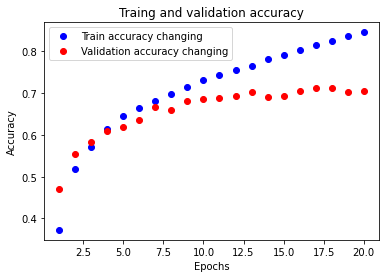

In [72]:
accuracy_model = history.history['accuracy']
val_accuracy_model = history.history['val_accuracy']

epochs = range(1, 20 + 1)

plt.plot(epochs, accuracy_model, 'bo', label = 'Train accuracy changing')
plt.plot(epochs, val_accuracy_model, 'ro', label = 'Validation accuracy changing')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We can see that the validation accuracy is improving less quickly than the train accuracy. 

EXO 10

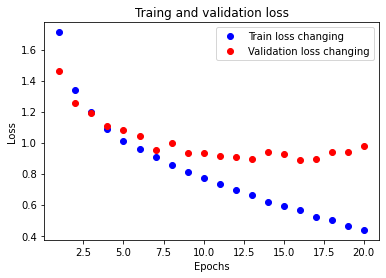

In [73]:
loss_model = history.history['loss']
val_loss_model = history.history['val_loss']

epochs = range(1, 20 + 1)

plt.plot(epochs, loss_model, 'bo', label = 'Train loss changing')
plt.plot(epochs, val_loss_model, 'ro', label = 'Validation loss changing')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Like for the accuracy, after a certain point, the validation loss is decreasing less quickly than train loss. And this from 7.5 epochs

EXO 11

In [74]:
netII = models.Sequential()
netII.add(layers.Conv2D(32,  kernel_size = 5, activation='relu', input_shape=(32, 32, 3)))
netII.add(layers.Conv2D(64,  kernel_size = 5, activation='relu'))
netII.add(layers.MaxPooling2D((2, 2),2))
netII.add(layers.Conv2D(64,  kernel_size = 5, activation='relu'))
netII.add(layers.MaxPooling2D((2, 2),2))
netII.add(layers.Flatten())
netII.add(layers.Dense(512, activation = 'relu'))
netII.add(layers.Dense(10, activation = 'softmax'))

EXO 12

In [77]:
netII.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

EXO 13

In [78]:
netII.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

EXO 14

In [79]:
history = netII.fit(train_images, train_labels, epochs=20, batch_size=128, 
                    validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 1.8021 - accuracy: 0.3307 - val_loss: 1.3402 - val_accuracy: 0.5178
Epoch 2/20
313/313 [==============================] - 3s 9ms/step - loss: 1.2615 - accuracy: 0.5484 - val_loss: 1.1465 - val_accuracy: 0.5961
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 1.0463 - accuracy: 0.6334 - val_loss: 0.9918 - val_accuracy: 0.6502
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 0.8948 - accuracy: 0.6868 - val_loss: 0.9410 - val_accuracy: 0.6719
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.7877 - accuracy: 0.7236 - val_loss: 0.9071 - val_accuracy: 0.6908
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.7014 - accuracy: 0.7551 - val_loss: 0.8804 - val_accuracy: 0.6939
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6134 - accuracy: 0.7844 - val_loss: 0.8529 - val_accuracy: 0.7094
Epo

EXO 15

In [81]:
prediction_test = netII.predict(test_images)

In [82]:
prediction_test[0][3]
#We can see from the resulat that in the vector, the higher probability is for the fourth position.

0.9979905

In [83]:
test_labels[0]
#Still good

array([3], dtype=uint8)

EXO 16

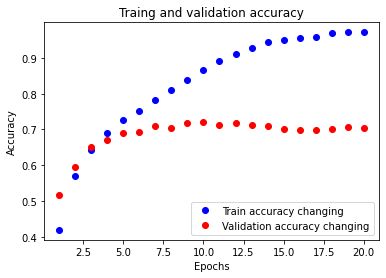

In [84]:
accuracy_model = history.history['accuracy']
val_accuracy_model = history.history['val_accuracy']

epochs = range(1, 20 + 1)

plt.plot(epochs, accuracy_model, 'bo', label = 'Train accuracy changing')
plt.plot(epochs, val_accuracy_model, 'ro', label = 'Validation accuracy changing')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

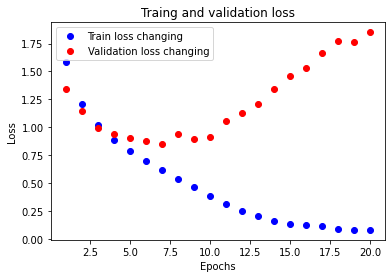

In [85]:
loss_model = history.history['loss']
val_loss_model = history.history['val_loss']

epochs = range(1, 20 + 1)

plt.plot(epochs, loss_model, 'bo', label = 'Train loss changing')
plt.plot(epochs, val_loss_model, 'ro', label = 'Validation loss changing')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see for both accuracy and loss validation that the curve start to over fitting way sooner than before (5 epochs for accuracy and 6 epochs for loss)

EXO 17

In [104]:
netIII = models.Sequential()
netIII.add(layers.Conv2D(96,  kernel_size = 3, strides = 1, padding = "same",activation='relu', input_shape=(32, 32, 3)))
netIII.add(layers.Conv2D(96,  kernel_size = 3, strides = 1, padding = "same",activation='relu'))
netIII.add(layers.MaxPooling2D((2, 2),2))
netIII.add(layers.Dropout(0.5))
netIII.add(layers.Conv2D(128,  kernel_size = 3, strides = 1, padding = "same",activation='relu'))
netIII.add(layers.MaxPooling2D((2, 2),2))
netIII.add(layers.Dropout(0.5))
netIII.add(layers.Conv2D(128,  kernel_size = 3, strides = 1, padding = "same",activation='relu'))
netIII.add(layers.Conv2D(128,  kernel_size = 3, strides = 1, padding = "same",activation='relu'))
netIII.add(layers.Conv2D(128,  kernel_size = 3, strides = 1, padding = "same",activation='relu'))
netIII.add(layers.MaxPooling2D((2, 2),2))
netIII.add(layers.Dropout(0.5))
netIII.add(layers.Flatten())
netIII.add(layers.Dense(1024, activation = 'relu', kernel_regularizer= tf.keras.regularizers.l2(l2=0.5)))
netIII.add(layers.Dense(512, activation = 'relu', kernel_regularizer= tf.keras.regularizers.l2(l2=0.5)))
netIII.add(layers.Dense(10, activation = 'softmax', kernel_regularizer= tf.keras.regularizers.l2(l2=0.5)))

EXO 18

In [105]:
netIII.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 96)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 128)       110720    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 8, 128)       

In [106]:
netIII.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [107]:
history = netIII.fit(train_images, train_labels, epochs=20, batch_size=128, 
                    validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 12s 34ms/step - loss: 176.5613 - accuracy: 0.1709 - val_loss: 2.1191 - val_accuracy: 0.2427
Epoch 2/20
313/313 [==============================] - 10s 32ms/step - loss: 2.0761 - accuracy: 0.2426 - val_loss: 1.9102 - val_accuracy: 0.3192
Epoch 3/20
313/313 [==============================] - 10s 32ms/step - loss: 1.9515 - accuracy: 0.3347 - val_loss: 1.8821 - val_accuracy: 0.3872
Epoch 4/20
313/313 [==============================] - 10s 31ms/step - loss: 1.8711 - accuracy: 0.3874 - val_loss: 1.7754 - val_accuracy: 0.4488
Epoch 5/20
313/313 [==============================] - 10s 31ms/step - loss: 1.8831 - accuracy: 0.4305 - val_loss: 1.6778 - val_accuracy: 0.4937
Epoch 6/20
313/313 [==============================] - 10s 31ms/step - loss: 1.7406 - accuracy: 0.4647 - val_loss: 1.7249 - val_accuracy: 0.5012
Epoch 7/20
313/313 [==============================] - 10s 31ms/step - loss: 1.6674 - accuracy: 0.5012 - val_loss: 1.6183 - val_accurac

In [108]:
prediction_test = netIII.predict(test_images)

In [109]:
prediction_test[0][3]
#We can see from the resulat that in the vector, the higher probability is for the fourth position.

0.5963217

In [110]:
test_labels[0]
#Still good

array([3], dtype=uint8)

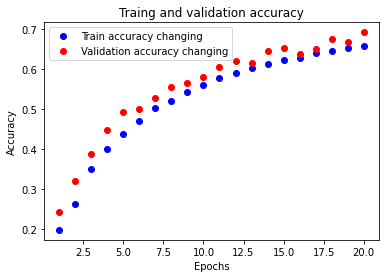

In [111]:
accuracy_model = history.history['accuracy']
val_accuracy_model = history.history['val_accuracy']

epochs = range(1, 20 + 1)

plt.plot(epochs, accuracy_model, 'bo', label = 'Train accuracy changing')
plt.plot(epochs, val_accuracy_model, 'ro', label = 'Validation accuracy changing')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

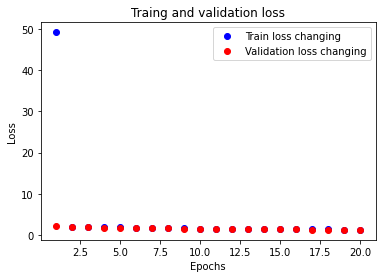

In [112]:
loss_model = history.history['loss']
val_loss_model = history.history['val_loss']

epochs = range(1, 20 + 1)

plt.plot(epochs, loss_model, 'bo', label = 'Train loss changing')
plt.plot(epochs, val_loss_model, 'ro', label = 'Validation loss changing')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Last model is the better one